# Mini-Project 3 - Loan Prediction
## Machine learning - Logistic Regression | Decision Tree | Random Forrest

### Loan Prediction - Data set chosen from Analytics Vidya 
Predict Loan Eligibility for Dream Housing Finance company
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

### Import packages

In [1]:
#Import Packages
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

#SkLearn
from sklearn.tree import DecisionTreeClassifier         
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score



sns.set_theme(context='notebook', style='darkgrid', palette='pastel', font='sans-serif', font_scale=1.5, color_codes=True, rc=None)

### Loan Data

In [2]:
#Load CVS File
loan_train = pd.read_csv('/Users/Neil/Desktop/Mini-Project 3/train_ctrUa4K.csv')

In [3]:
# View DF
loan_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Exploratory Data Analysis [EDA]

### Quick look at the Data

In [4]:
#DF info
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### Observastion 
- 3 different data types 
- 13 Columns
- 614 Rows of data

- object: Object format means variables are categorical. Categorical variables in our dataset are: Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status

- int64: It represents the integer variables. ApplicantIncome is of this format.

- float64: It represents the variable which have some decimal values involved. They are also numerical variables. Numerical variables in our dataset are: CoapplicantIncome, LoanAmount, Loan_Amount_Term, and Credit_History

### Missing Values [Nulls]

In [5]:
#Null value count 
loan_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

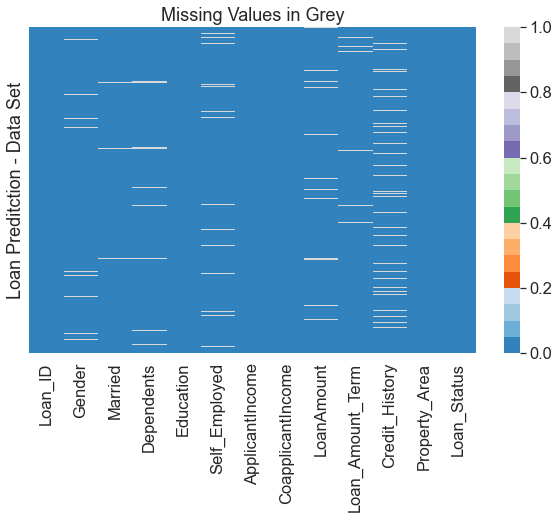

In [6]:
#Visualise Nulls 
plt.figure(figsize=(10,6))
sns.heatmap(loan_train.isnull(),yticklabels=False, cmap="tab20c")
plt.ylabel('Loan Preditction - Data Set')
plt.title('Missing Values in Grey')
plt.show()

#### Understanding 

In [7]:
#Looking at dependents
print(loan_train.Dependents.unique())

['0' '1' '2' '3+' nan]


In [8]:
# replacing 3+ in Dependents variable with 3 
loan_train['Dependents'].replace('3+', '3', inplace=True)

#### Filling Null Values

- For numerical variables: imputation using median
- For categorical variables: imputation using mode

In [9]:
#Using mode for all Categorical Variable 
loan_train['Gender'].fillna(loan_train['Gender'].mode()[0], inplace=True)
loan_train['Married'].fillna(loan_train['Married'].mode()[0], inplace=True)
loan_train['Dependents'].fillna(loan_train['Dependents'].mode()[0], inplace=True)
loan_train['Self_Employed'].fillna(loan_train['Self_Employed'].mode()[0], inplace=True)
loan_train['Credit_History'].fillna(loan_train['Credit_History'].mode()[0], inplace=True)

In [10]:
#Using mode to fill in null values for length
loan_train['Loan_Amount_Term'].fillna(loan_train['Loan_Amount_Term'].mode()[0], inplace=True)

In [11]:
#Using median to fill in null values for Loan Amount 
loan_train['LoanAmount'].fillna(loan_train['LoanAmount'].median(), inplace=True)

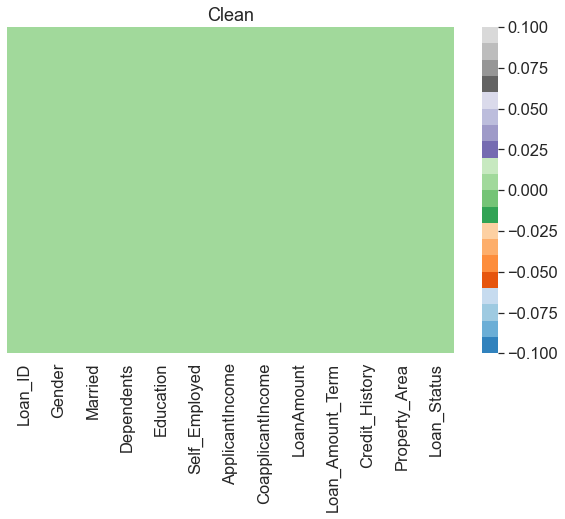

In [12]:
#Visualise Nulls 
plt.figure(figsize=(10,6))
sns.heatmap(loan_train.isnull(),yticklabels=False, cmap="tab20c")
plt.title('Clean')
plt.show()

### Target Variable (Categorical)

- Loan_Status: Approved or not

In [13]:
#Value count
print(loan_train['Loan_Status'].value_counts())
print('/n')
# percentage distribution of how many loans have been approved
print(loan_train['Loan_Status'].value_counts(normalize=True))

Y    422
N    192
Name: Loan_Status, dtype: int64
/n
Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64


Text(0.5, 1.0, 'Approved | Declined')

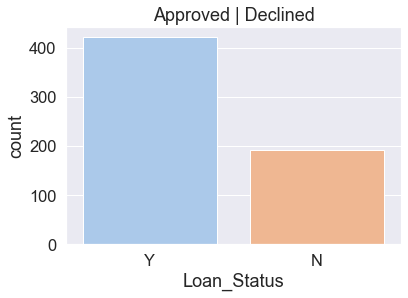

In [14]:
# bar plot to visualize the frequency
sns.countplot(data=loan_train,x='Loan_Status')
plt.title('Approved | Declined')

### Indepentant Variables 

- Gender
- Married
- Self-employed
- Credit history 
- Education

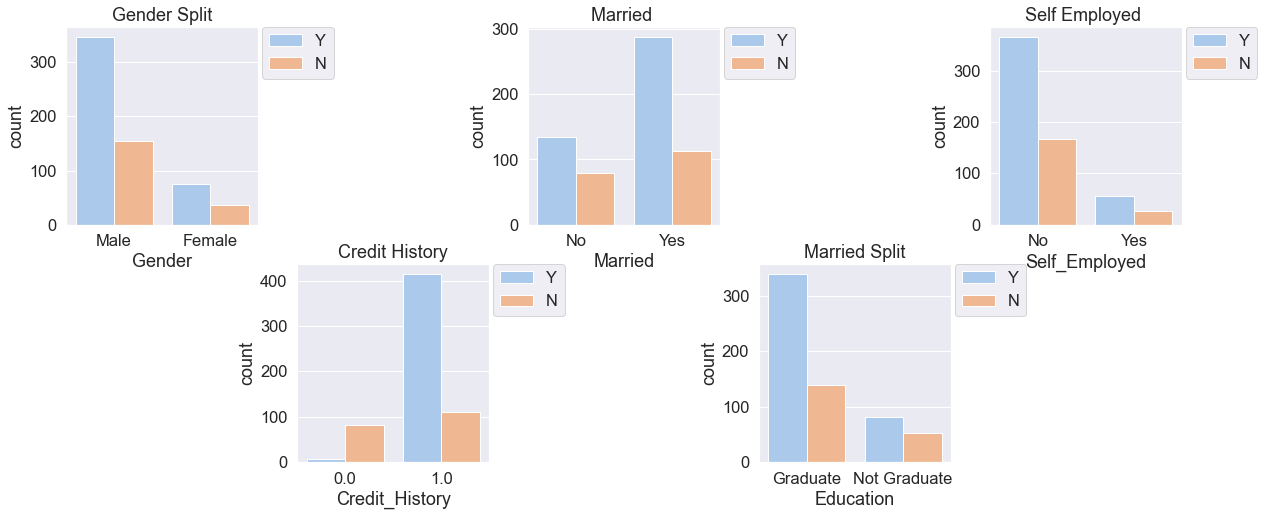

In [15]:
#Visualise 
plt.figure(figsize = (20, 8))

plt.subplot(251)
sns.countplot(data= loan_train, x= 'Gender', hue = 'Loan_Status')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Gender Split') 

plt.subplot(253)
sns.countplot(data= loan_train, x= 'Married', hue = 'Loan_Status')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Married ') 

plt.subplot(255)
sns.countplot(data= loan_train, x= 'Self_Employed', hue = 'Loan_Status')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Self Employed ') 

plt.subplot(257)
sns.countplot(data= loan_train, x= 'Credit_History', hue = 'Loan_Status')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Credit History') 

plt.subplot(259)
sns.countplot(data= loan_train, x= 'Education', hue = 'Loan_Status')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Married Split')


plt.show()

In [16]:
#Percentage of applications by Gender 
print(loan_train['Gender'].value_counts(normalize=True), '\n')

# Percentage of Approvals by Gender
print(loan_train['Loan_Status'].groupby(loan_train['Gender']).value_counts(normalize=True))

Male      0.81759
Female    0.18241
Name: Gender, dtype: float64 

Gender  Loan_Status
Female  Y              0.669643
        N              0.330357
Male    Y              0.691235
        N              0.308765
Name: Loan_Status, dtype: float64


In [17]:
#Percentage of applications by marriage
print(loan_train['Married'].value_counts(normalize=True), '\n')

#Percentage of Approvals by marriage
print(loan_train['Loan_Status'].groupby(loan_train['Married']).value_counts(normalize=True))

Yes    0.653094
No     0.346906
Name: Married, dtype: float64 

Married  Loan_Status
No       Y              0.629108
         N              0.370892
Yes      Y              0.718204
         N              0.281796
Name: Loan_Status, dtype: float64


In [18]:
#Percentage of applicants that are self employed
print(loan_train['Self_Employed'].value_counts(normalize=True),'\n')

#Percentage of approvals that are self employed 
print(loan_train['Loan_Status'].groupby(loan_train['Self_Employed']).value_counts(normalize=True))

No     0.86645
Yes    0.13355
Name: Self_Employed, dtype: float64 

Self_Employed  Loan_Status
No             Y              0.687970
               N              0.312030
Yes            Y              0.682927
               N              0.317073
Name: Loan_Status, dtype: float64


In [19]:
#Percentage of applicants that have Credit history apart of their application
print(loan_train['Credit_History'].value_counts(normalize=True), '\n')

#Percentage of approvals that have Credit history apart of their application
print(loan_train['Loan_Status'].groupby(loan_train['Credit_History']).value_counts(normalize=True))

1.0    0.855049
0.0    0.144951
Name: Credit_History, dtype: float64 

Credit_History  Loan_Status
0.0             N              0.921348
                Y              0.078652
1.0             Y              0.790476
                N              0.209524
Name: Loan_Status, dtype: float64


In [20]:
#Percentage of applications that have completed studies
print(loan_train['Education'].value_counts(normalize=True),'\n')

#Percentage of approvals plit by education
print(loan_train['Loan_Status'].groupby(loan_train['Education']).value_counts(normalize=True))

Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64 

Education     Loan_Status
Graduate      Y              0.708333
              N              0.291667
Not Graduate  Y              0.611940
              N              0.388060
Name: Loan_Status, dtype: float64


80% of applicants in the dataset are male.
Around 65% of the applicants in the dataset are married.
About 15% of applicants in the dataset are self-employed.
About 85% of applicants have repaid their debts.

### Numerical Columns

In [21]:
#Decribe Applicants Income 
print('Applicant Income', '\n',loan_train['ApplicantIncome'].describe())

Applicant Income 
 count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64


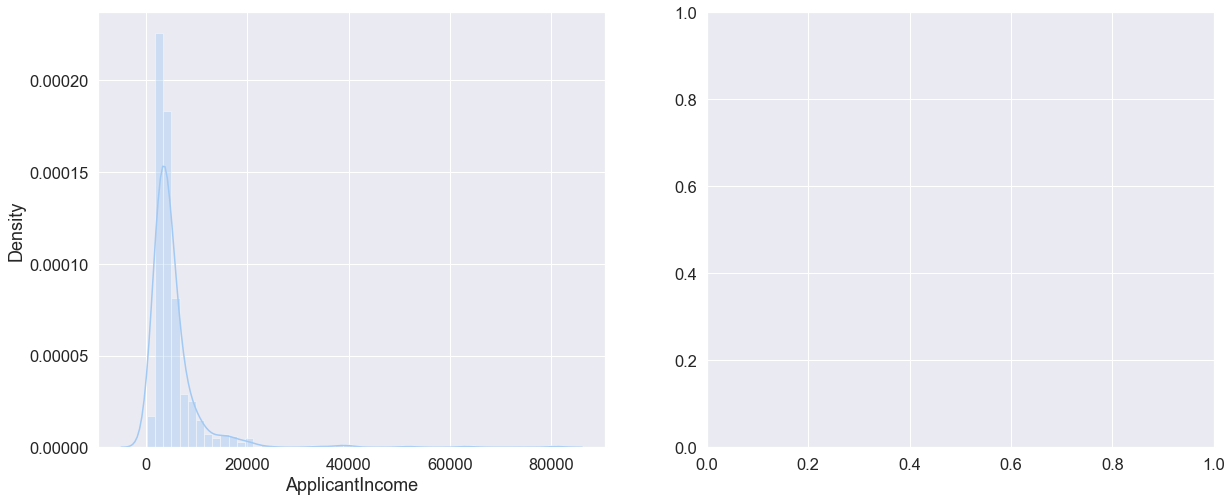

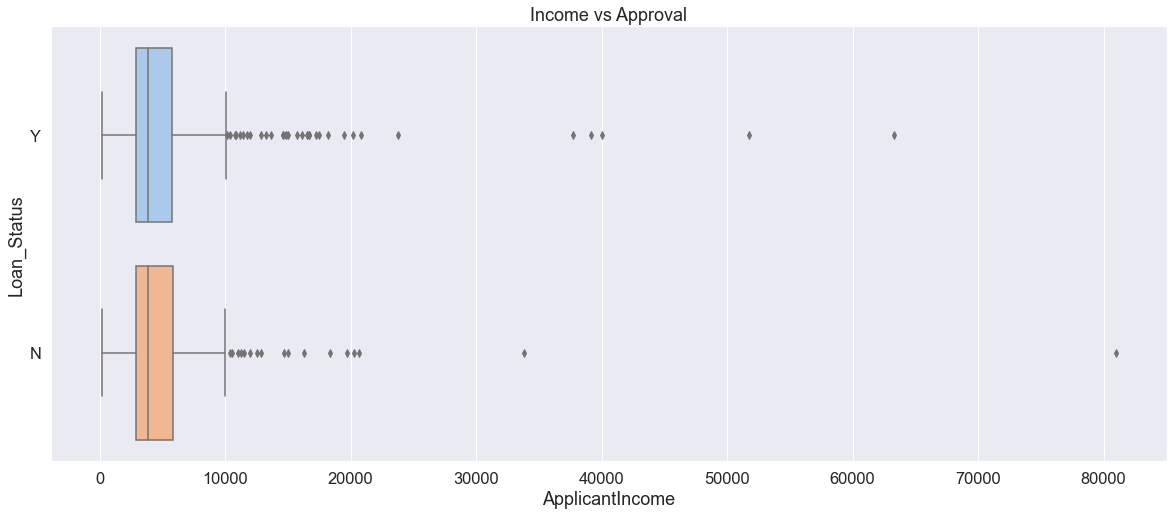

In [22]:
#Distrabution plot
plt.figure(figsize = (20, 8))
plt.subplot(121)
sns.distplot(loan_train['ApplicantIncome'])


#Income vs appoval
plt.subplot(122)
plt.figure(figsize = (20, 8))
sns.boxplot(data= loan_train, x= 'ApplicantIncome', y= 'Loan_Status')
plt.title('Income vs Approval')

plt.show()

No Income contributed from Coapplicant 
 273


Decribe Coapplicant 
 count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64


Text(0.5, 1.0, 'Income vs Approval')

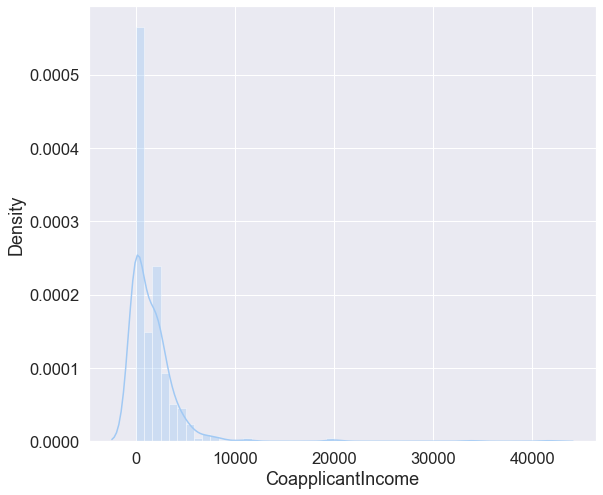

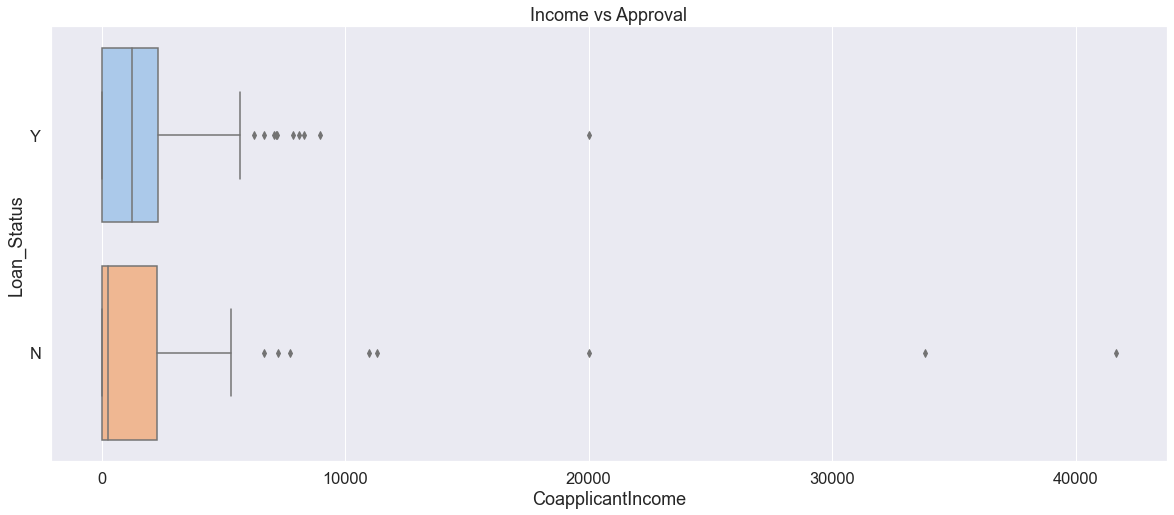

In [23]:
#Value counts of Coapplicants with no contribution 
print('No Income contributed from Coapplicant', '\n',loan_train[loan_train['CoapplicantIncome']==0].value_counts().sum())
print('\n')
#Decribe Total income
print('Decribe Coapplicant', '\n',loan_train['CoapplicantIncome'].describe())


#Distrabution plot
plt.figure(figsize = (20, 8))
plt.subplot(121)
sns.distplot(loan_train['CoapplicantIncome'])

#Coapplicant income vs approval
plt.figure(figsize = (20, 8))
sns.boxplot(data= loan_train, x= 'CoapplicantIncome', y= 'Loan_Status')
plt.title('Income vs Approval')

#### Feature Engineer Total Income

count      614.000000
mean      7024.705081
std       6458.663872
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: Total_Income, dtype: float64


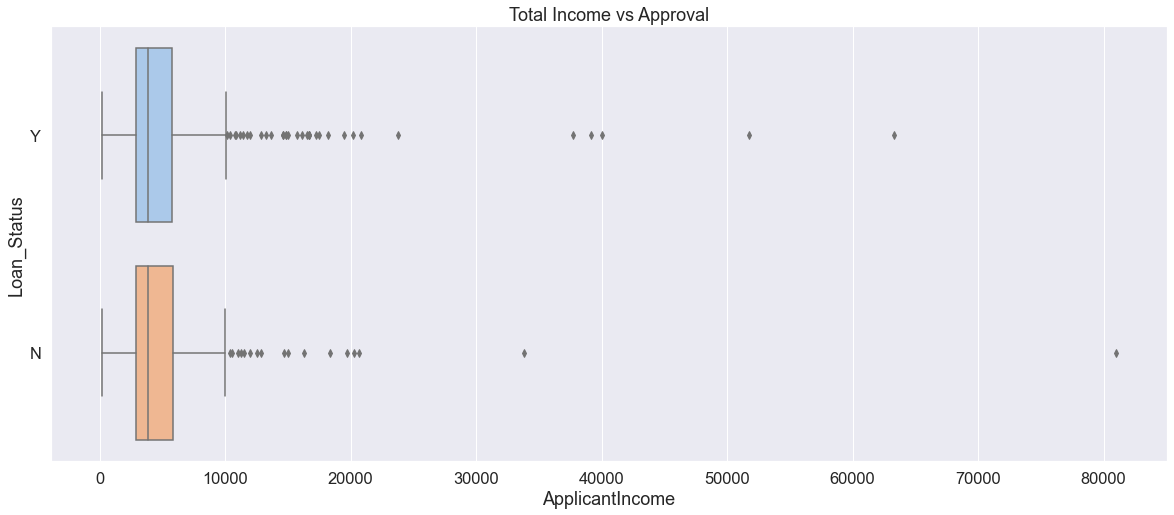

In [24]:
#Feature engineer - Add Applicant income and Coapplicant Income
loan_train['Total_Income'] = loan_train['ApplicantIncome'] + loan_train['CoapplicantIncome']

#Decribe Total income
print(loan_train['Total_Income'].describe())

#Boxplot
plt.figure(figsize = (20, 8))
sns.boxplot(data= loan_train, x= 'ApplicantIncome', y= 'Loan_Status')
plt.title('Total Income vs Approval')
plt.show()

Text(0.5, 1.0, 'Total Income Distribution')

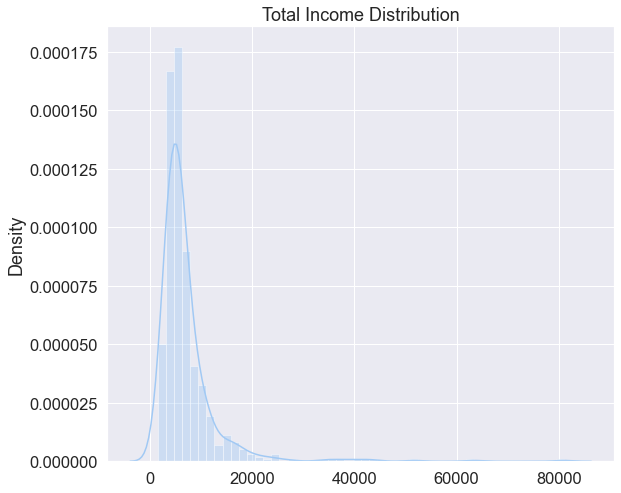

In [25]:
#Total income distribution 
plt.figure(figsize = (20, 8))
plt.subplot(121)
sns.distplot(x=loan_train['Total_Income'])
plt.title('Total Income Distribution')

Loan Amount 
 count    614.000000
mean     145.752443
std       84.107233
min        9.000000
25%      100.250000
50%      128.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64


Text(0.5, 1.0, 'Loan Amount Distribution')

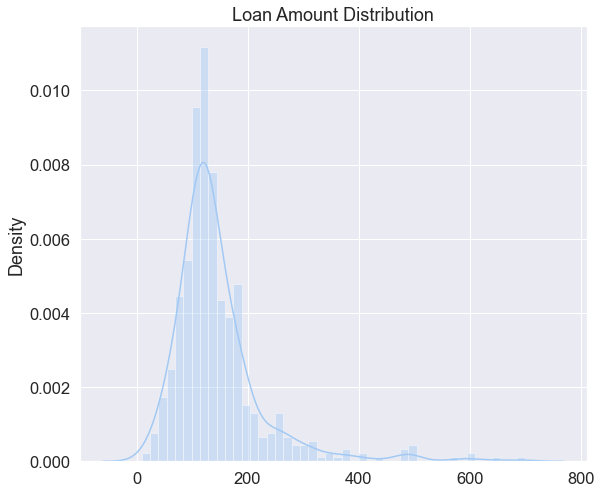

In [26]:
#Decribe Applicants Income 
print('Loan Amount', '\n',loan_train['LoanAmount'].describe())

#dist plot 
plt.figure(figsize = (20, 8))
plt.subplot(121)
sns.distplot(x=loan_train['LoanAmount'])
plt.title('Loan Amount Distribution')

Text(0.5, 1.0, 'Closer look at the correlation')

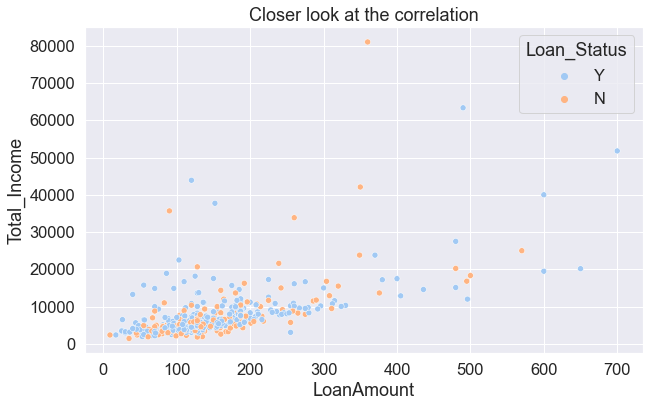

In [27]:
#Scatter plot total income vs loan amount 
plt.figure(figsize=(10,6))
sns.scatterplot(x = loan_train['LoanAmount'], y = loan_train['Total_Income'], hue =loan_train['Loan_Status'] )
plt.title('Closer look at the correlation')

### Ordinal Columns

- Dependents 
- Property Area 

Text(0.5, 1.0, 'Property Area Approval')

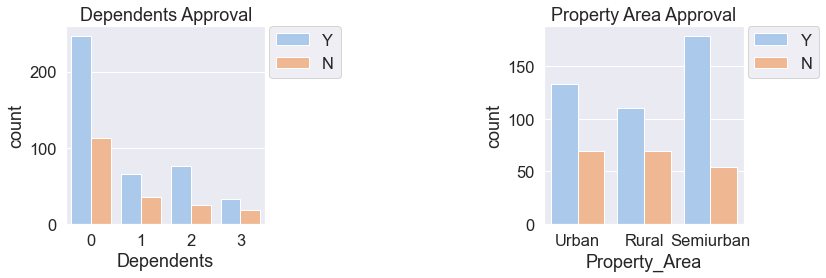

In [28]:
#Visualise
plt.figure(figsize = (25, 8))

plt.subplot(263)
sns.countplot(data= loan_train, x= 'Dependents', hue = 'Loan_Status')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Dependents Approval')

plt.subplot(265)
sns.countplot(data= loan_train, x= 'Property_Area', hue = 'Loan_Status')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Property Area Approval')

In [73]:
#Ordinal coloumns approval percentage
print(loan_train['Loan_Status'].groupby(loan_train['Dependents']).value_counts(normalize=True), '\n')


print(loan_train['Loan_Status'].groupby(loan_train['Property_Area']).value_counts(normalize=True))

Dependents  Loan_Status
0           1              0.686111
            0              0.313889
1           1              0.647059
            0              0.352941
2           1              0.752475
            0              0.247525
3           1              0.647059
            0              0.352941
Name: Loan_Status, dtype: float64 

Property_Area  Loan_Status
Rural          1              0.614525
               0              0.385475
Semiurban      1              0.768240
               0              0.231760
Urban          1              0.658416
               0              0.341584
Name: Loan_Status, dtype: float64


In [30]:
#Ordinal columns 
print(loan_train['Dependents'].value_counts(normalize=True), '\n')


print(loan_train['Property_Area'].value_counts(normalize=True))

0    0.586319
1    0.166124
2    0.164495
3    0.083062
Name: Dependents, dtype: float64 

Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64


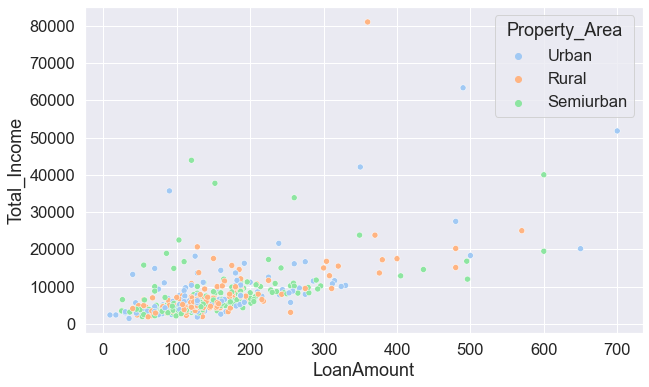

In [31]:
# Property Area vs Loan Amount
plt.figure(figsize=(10,6))
sns.scatterplot(x=loan_train['LoanAmount'], y = loan_train['Total_Income'], hue =loan_train['Property_Area'])
plt.show()

### Correlation 

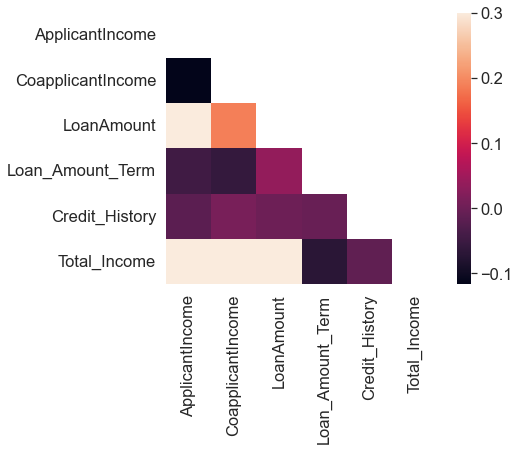

In [32]:
# Corr heat map 
corr = loan_train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)


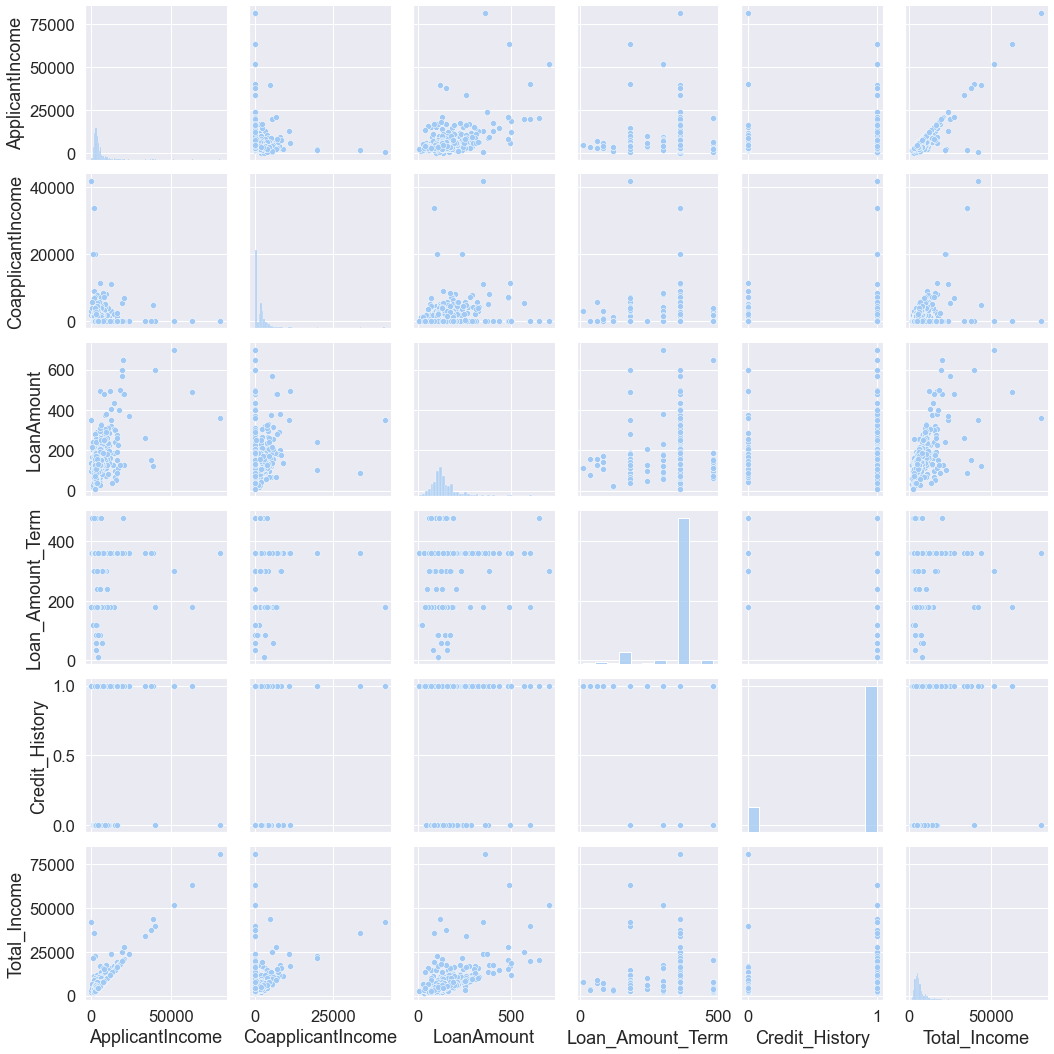

In [33]:
# Pairplot to see corr 
sns.pairplot(loan_train)
plt.show()

### Data Pre-processing for Machine Learning
 
 - Drop Loan ID 
 - Encode Data 

In [34]:
#Loan ID isn't needed 
loan_train.drop(columns=['Loan_ID'], inplace=True)

In [35]:
# replacing Y and N in Loan_Status variable with 1 and 0 respectively
loan_train['Loan_Status'].replace('N', 0, inplace=True)
loan_train['Loan_Status'].replace('Y', 1, inplace=True)

In [36]:
# Encode the Data set 
loan_encoded = pd.get_dummies(loan_train,drop_first=True)
loan_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,1,5849.0,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,6091.0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,3000.0,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,1,4941.0,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,6000.0,1,0,0,0,0,0,0,0,1


In [37]:
#Check New Columns 
loan_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          614 non-null    int64  
 1   CoapplicantIncome        614 non-null    float64
 2   LoanAmount               614 non-null    float64
 3   Loan_Amount_Term         614 non-null    float64
 4   Credit_History           614 non-null    float64
 5   Loan_Status              614 non-null    int64  
 6   Total_Income             614 non-null    float64
 7   Gender_Male              614 non-null    uint8  
 8   Married_Yes              614 non-null    uint8  
 9   Dependents_1             614 non-null    uint8  
 10  Dependents_2             614 non-null    uint8  
 11  Dependents_3             614 non-null    uint8  
 12  Education_Not Graduate   614 non-null    uint8  
 13  Self_Employed_Yes        614 non-null    uint8  
 14  Property_Area_Semiurban  6

### Target And Feature

In [38]:
# Set Target and Feature
X = loan_encoded.drop(columns=['Loan_Status' ,'ApplicantIncome', 'CoapplicantIncome'])
y = loan_encoded['Loan_Status']

### Train Test Split
- 80 / 20 split

In [39]:
# Train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2,random_state=1)

In [40]:
#Check shape
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape )

(491, 13) (123, 13) (491,) (123,)


### Logistic Regression

In [41]:
# Create Model
logreg = LogisticRegression()

In [42]:
# Fit Model
logreg.fit(X_train, y_train)

LogisticRegression()

In [43]:
# Log coef 
logreg.coef_

array([[-5.29030503e-04, -5.28880003e-03,  3.04839730e+00,
        -1.54809850e-05, -1.35874628e-01,  2.91825392e-01,
        -2.11221149e-01,  1.89638083e-01,  6.82027414e-02,
        -5.33702178e-01, -3.39269783e-02,  7.12886680e-01,
        -1.21163784e-01]])

In [44]:
# Log intercept 
logreg.intercept_

array([0.12424581])

In [45]:
#Log score for train 
logreg.score(X_train, y_train)

0.8085539714867617

In [46]:
#Log Score for test 
logreg.score(X_test, y_test)

0.8048780487804879

In [47]:
# Matrix 
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[16 23]
 [ 1 83]]


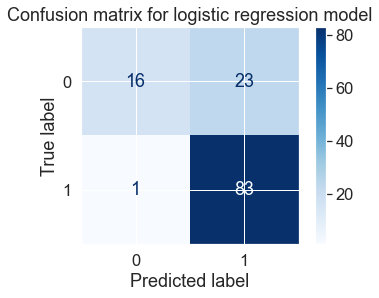

In [48]:
# Visualise
metrics.plot_confusion_matrix(logreg, X_test, y_test,
                              cmap=plt.cm.Blues,
                              values_format='d')
plt.title('Confusion matrix for logistic regression model')
plt.show()

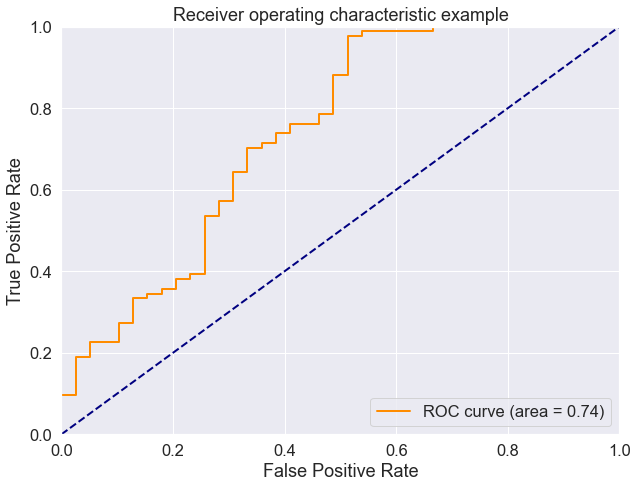

In [49]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = logreg.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(10,7.5))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

### Decision Tree

In [50]:
# Model
model = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35)
print(model)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=35)


In [51]:
# Fit model 
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=35)

In [52]:
# Summary Report Def 
def show_summary_report(actual, prediction):

    if isinstance(actual, pd.Series):
        actual = actual.values.astype(int)
    prediction = prediction.astype(float)
    prediction_int = prediction.astype(int)

    print('Accuracy : %.4f [TP / N]         Best: 1, Worst: 0' %
          accuracy_score(actual, prediction_int))
    msg = '           Proportion of predicted labels that match the true labels.'
    print(msg)
    print('Precision: %.4f [TP / (TP + FP)] Best: 1, Worst: 0' %
          precision_score(actual, prediction_int))
    msg = '           Not to label a negative sample as positive.'
    print(msg)
    print('Recall   : %.4f [TP / (TP + FN)] Best: 1, Worst: 0' %
          recall_score(actual, prediction_int))
    msg = '           Find all the positive samples.'
    print(msg)
    print('ROC AUC  : %.4f                  Best: 1, Worst: < 0.5' %
          roc_auc_score(actual, prediction))
    print('-' * 80)
    print('TP: True Positives, FP: False Positives,')
    print('TN: True Negatives, FN: False Negatives,')
    print('N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction_int)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, prediction)
    roc_auc = auc(fpr, tpr)

    # plot
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    fig.subplots_adjust(left=0.02, right=0.98, wspace=0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square=True, annot=True, fmt='d',
                cbar=False, cmap='Blues', ax=ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')

    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color='b', alpha=0.2, where='post')
    ax[1].fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color='darkorange', lw=2,
               label='ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc='lower right')

    plt.show()

In [53]:
# Y-Predict train
y_train_pred = model.predict(X_train)

In [54]:
# Train Score
model.score(X_train, y_train)

0.8105906313645621

Accuracy : 0.8106 [TP / N]         Best: 1, Worst: 0
           Proportion of predicted labels that match the true labels.
Precision: 0.7924 [TP / (TP + FP)] Best: 1, Worst: 0
           Not to label a negative sample as positive.
Recall   : 0.9822 [TP / (TP + FN)] Best: 1, Worst: 0
           Find all the positive samples.
ROC AUC  : 0.7068                  Best: 1, Worst: < 0.5
--------------------------------------------------------------------------------
TP: True Positives, FP: False Positives,
TN: True Negatives, FN: False Negatives,
N: Number of samples


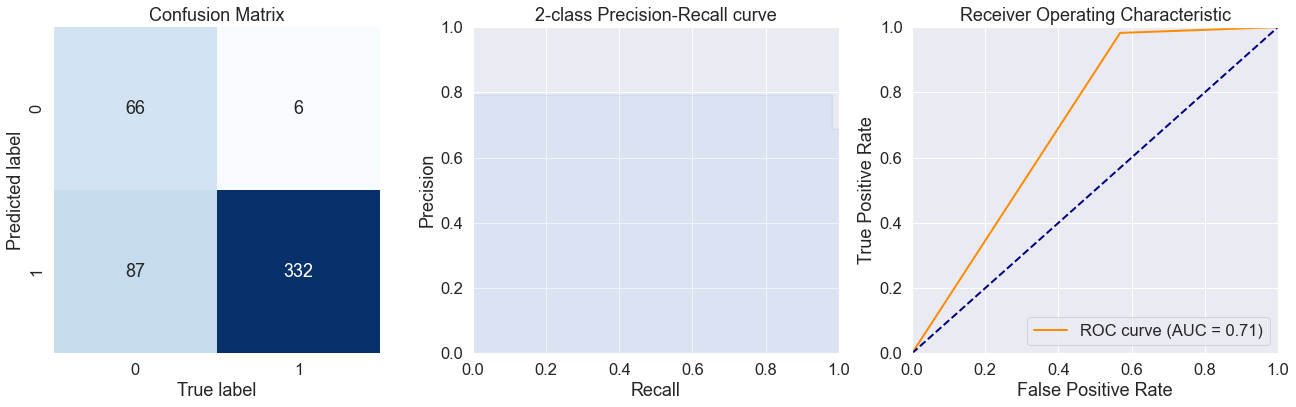

In [55]:
#Show Report
show_summary_report(y_train, y_train_pred)

In [56]:
# test data predict 
y_test_pred = model.predict(X_test)

In [57]:
# Score for predict
model.score(X_test, y_test)

0.8048780487804879

Accuracy : 0.8049 [TP / N]         Best: 1, Worst: 0
           Proportion of predicted labels that match the true labels.
Precision: 0.7830 [TP / (TP + FP)] Best: 1, Worst: 0
           Not to label a negative sample as positive.
Recall   : 0.9881 [TP / (TP + FN)] Best: 1, Worst: 0
           Find all the positive samples.
ROC AUC  : 0.6992                  Best: 1, Worst: < 0.5
--------------------------------------------------------------------------------
TP: True Positives, FP: False Positives,
TN: True Negatives, FN: False Negatives,
N: Number of samples


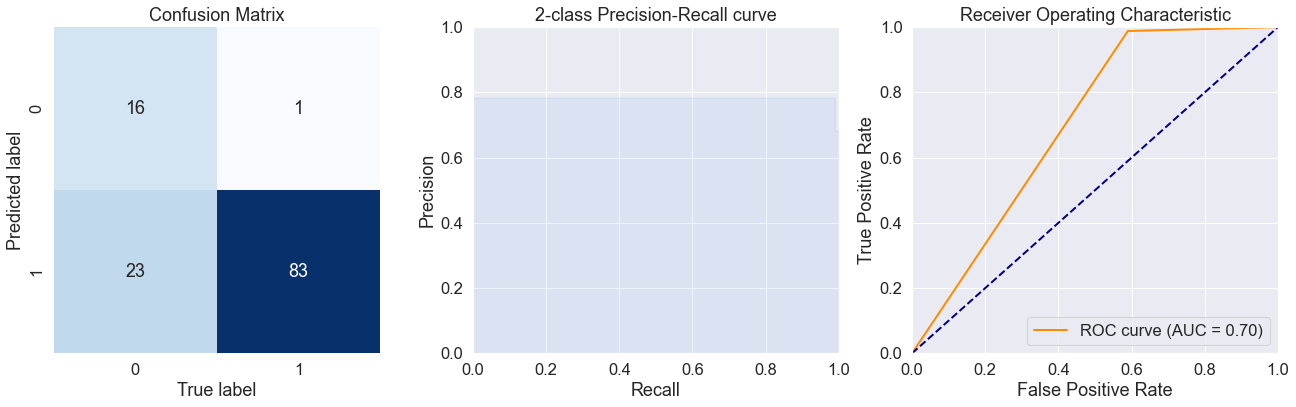

In [58]:
# Show Summary for prediction test 
show_summary_report(y_test, y_test_pred)

In [59]:
height = pd.DataFrame(model.feature_importances_)

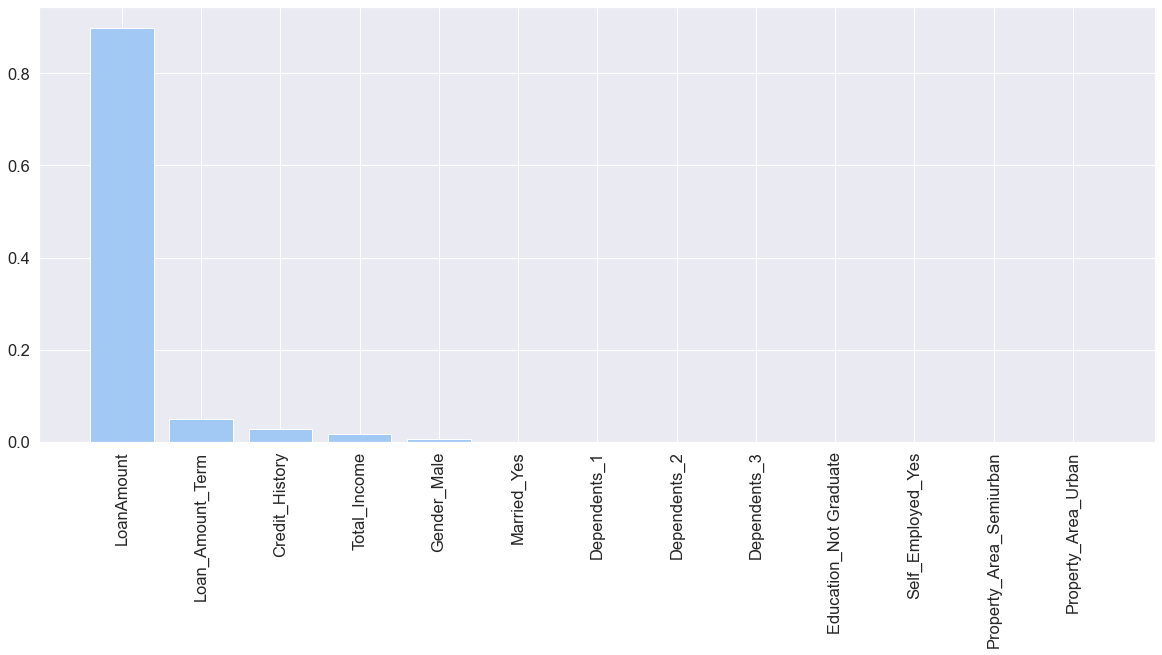

In [60]:
plt.figure(figsize = (20, 8))
plt.bar(X.columns, height[0].sort_values(ascending=False))
plt.xticks(rotation = 90)
plt.show()

### Random Forrest

In [61]:
#Define model
model = RandomForestClassifier(oob_score=True)
print(model)

RandomForestClassifier(oob_score=True)


In [62]:
#Fit the model
model.fit(X_train, y_train)

RandomForestClassifier(oob_score=True)

In [63]:
#Train predict and proba
y_train_pred = model.predict(X_train)
y_train_prob = model.predict_proba(X_train)

In [64]:
#Train score
model.score(X_train, y_train)

1.0

In [65]:
# oob score
model.oob_score_

0.8024439918533605

In [66]:
def show_summary_report(actual, prediction, probabilities):

    if isinstance(actual, pd.Series):
        actual = actual.values.astype(int)
    prediction = prediction.astype(int)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_score(actual, prediction))
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_score(actual, prediction))
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_score(actual, prediction))
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_score(actual, probabilities[:, 1]))
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, probabilities[:, 1])
    roc_auc = auc(fpr, tpr)


    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()

Accuracy : 1.0000 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 1.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 1.0000 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 1.0000                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


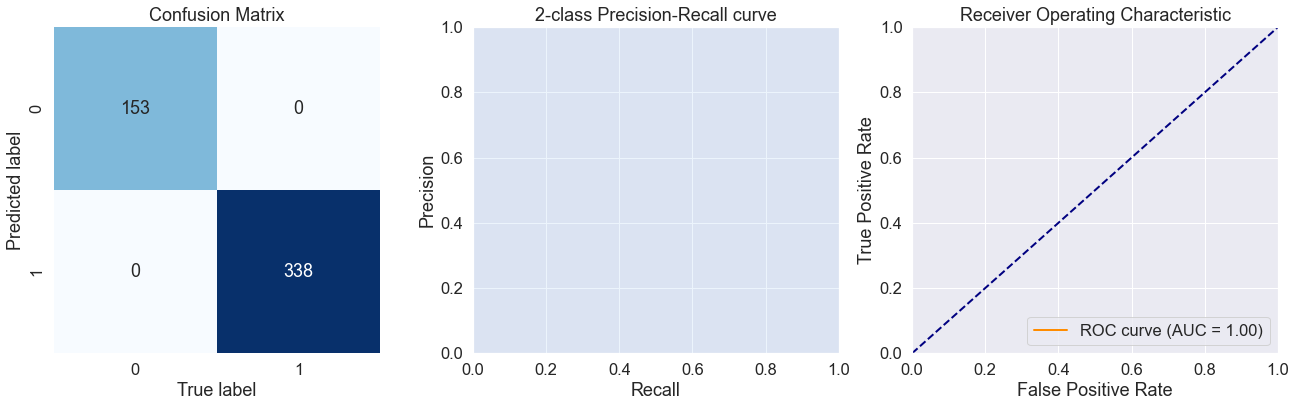

In [67]:
show_summary_report(y_train, y_train_pred, y_train_prob)

In [68]:
# Make Preditction 
y_test_pred = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)

In [69]:
# test score 
model.score(X_test, y_test)

0.7479674796747967

Accuracy : 0.7480 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7732 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8929 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7679                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


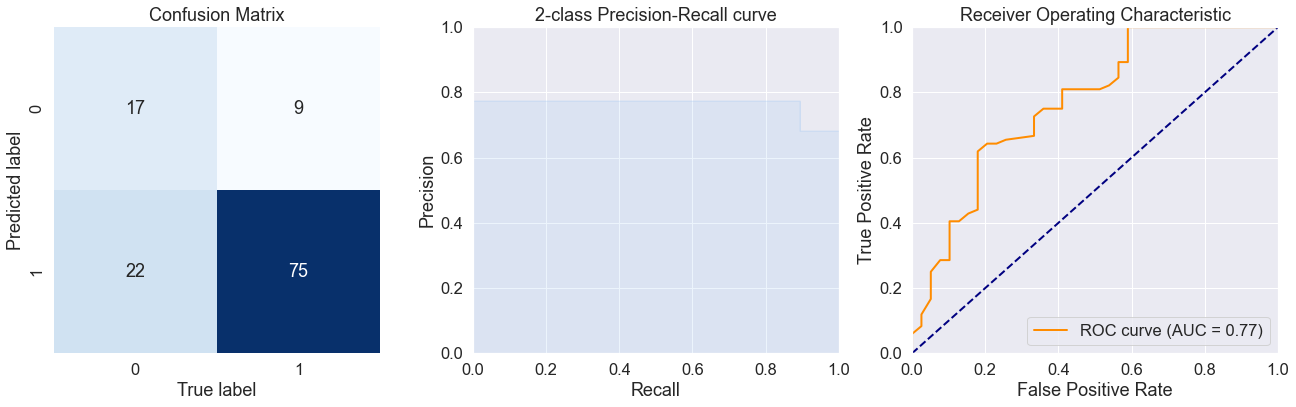

In [70]:
show_summary_report(y_test, y_test_pred, y_test_prob)

In [71]:
height = pd.DataFrame(model.feature_importances_)

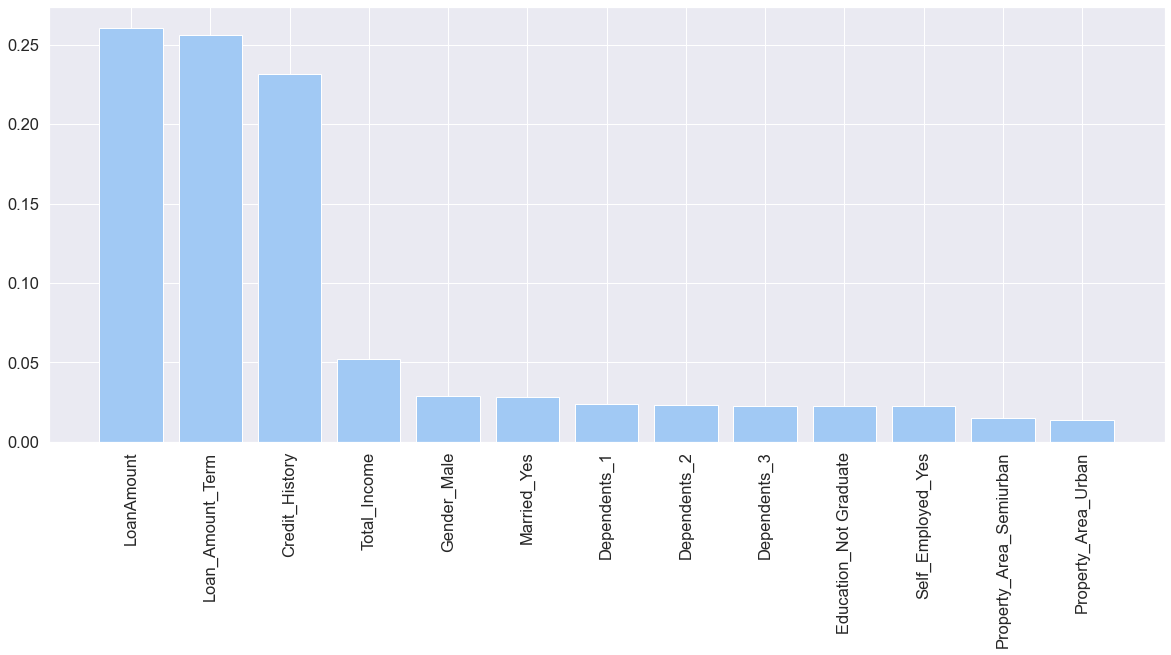

In [72]:
plt.figure(figsize = (20, 8))
plt.bar(X.columns, height[0].sort_values(ascending=False))
plt.xticks(rotation = 90)
plt.show()

### Wrap

After trying three different methods Logistic regression and Decision Tree had performed similarly 

Random Forest had overtrained the training data and had slightly lower results

What to try next: 
Standardise the Numerical values 
Remove outliers 
Adding a new feature EMI: Equated Monthly Instalments and see if there is a trend 
Adding the K-Fold method 
XGBoost 
